 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [80]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [81]:
from pathlib import Path
Path.cwd()
output_path = Path ('output.txt')

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

In [82]:
import os
os.getcwd


<function posix.getcwd()>

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [83]:
# Reading whale returns
whale_csv = Path('Resources/whale_returns.csv')

# YOUR CODE HERE
whale_df = pd.read_csv(whale_csv, index_col='Date', infer_datetime_format= True, parse_dates= True)
whale_df.sort_index(inplace= True)
whale_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


In [84]:
# Count nulls
whale_df. isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [85]:
# Drop nulls
whale_df.dropna(inplace = True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [86]:
# Reading algorithmic returns
algo_returns_csv = Path('Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_returns_csv, index_col='Date', infer_datetime_format= True, parse_dates= True)
algo_df.sort_index(inplace= True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [87]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [88]:
# Drop nulls
algo_df.dropna(inplace = True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [89]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path('Resources/sp500_history.csv')
sp500_history_df = pd.read_csv (sp500_history_csv, index_col = 'Date', infer_datetime_format=True, parse_dates=True)
sp500_history_df.sort_index(inplace=True)
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [90]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [91]:
# Fix Data Types
sp500_history_df['Close']= sp500_history_df['Close'].str.replace('$','')
sp500_history_df['Close'] = sp500_history_df['Close'].astype ('float')
sp500_history_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [92]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [93]:
# Drop nulls
sp500_daily_returns.dropna(inplace = True)

In [94]:
# Rename Columns
sp500_daily_returns.columns = ['S&P 500 Daily Return']
sp500_daily_returns.head()

,S&P 500 Daily Return
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [95]:
# Concatenate all DataFrames into a single DataFrame
all_data = pd.concat([whale_df,algo_df,sp500_daily_returns], axis = 'columns', join = 'inner')
all_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

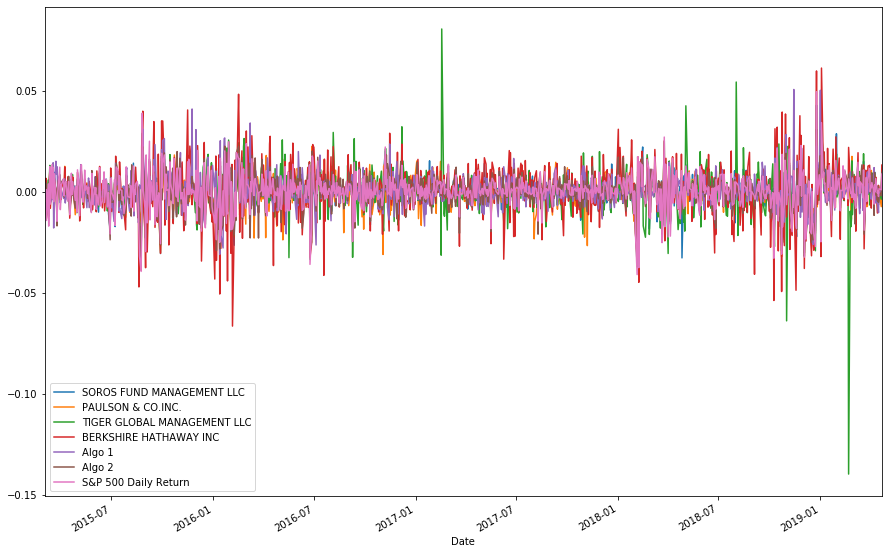

In [96]:
# Plot daily returns
all_data.plot(figsize = (15,10))

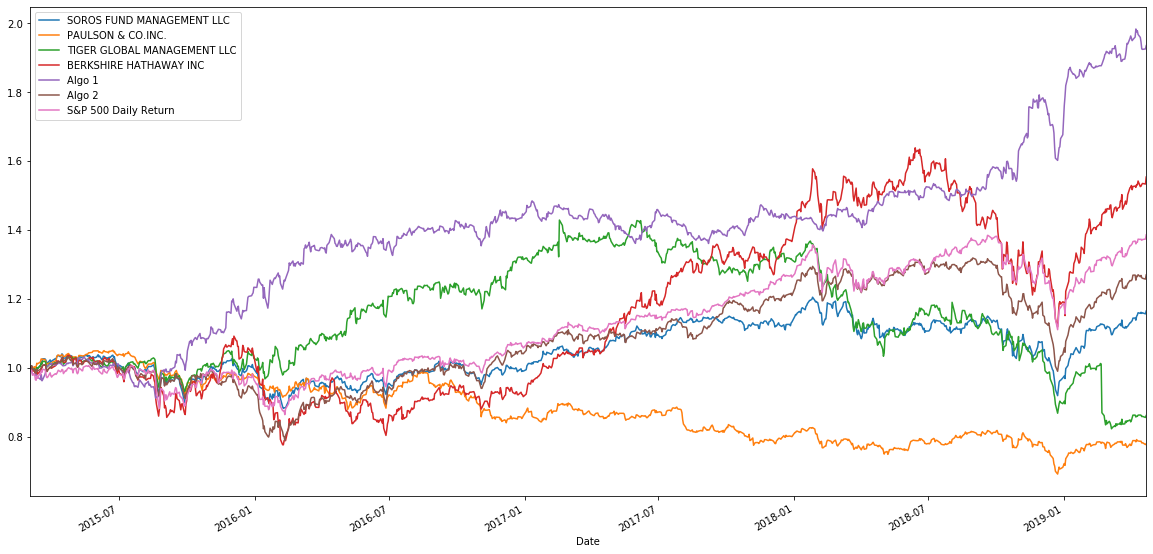

In [97]:
# Plot cumulative returns
cul_returns = (1+all_data).cumprod()
cul_returns.head()
cul_returns.plot(figsize= (20,10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

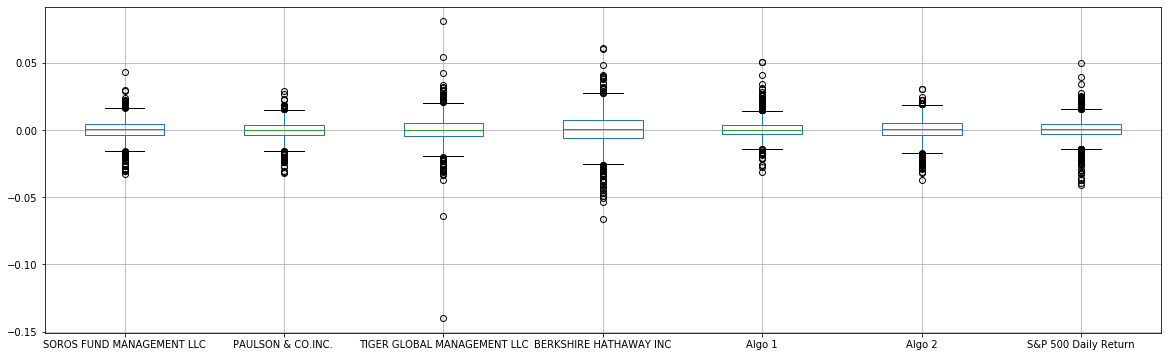

In [99]:
# Box plot to visually show risk
all_data.boxplot(figsize=(20,6))

In [100]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
standard_deviations = all_data.std()
standard_deviations.sort_values(inplace=True)
standard_deviations

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500 Daily Return           0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [101]:
# Determine which portfolios are riskier than the S&P 500
standard_deviations[5:]

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [102]:
# Calculate the annualized standard deviation (252 trading days)
annualized_standard_deviations = all_data.std()*np.sqrt(252)
annualized_standard_deviations.sort_values(inplace=True)
annualized_standard_deviations

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500 Daily Return           0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

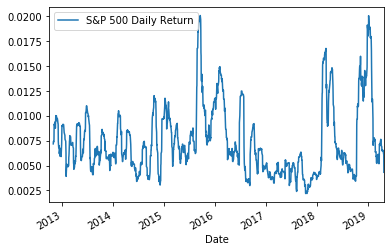

In [104]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
sp500_rolling_std = sp500_daily_returns.rolling(window=21).std()
sp500_rolling_std.plot()

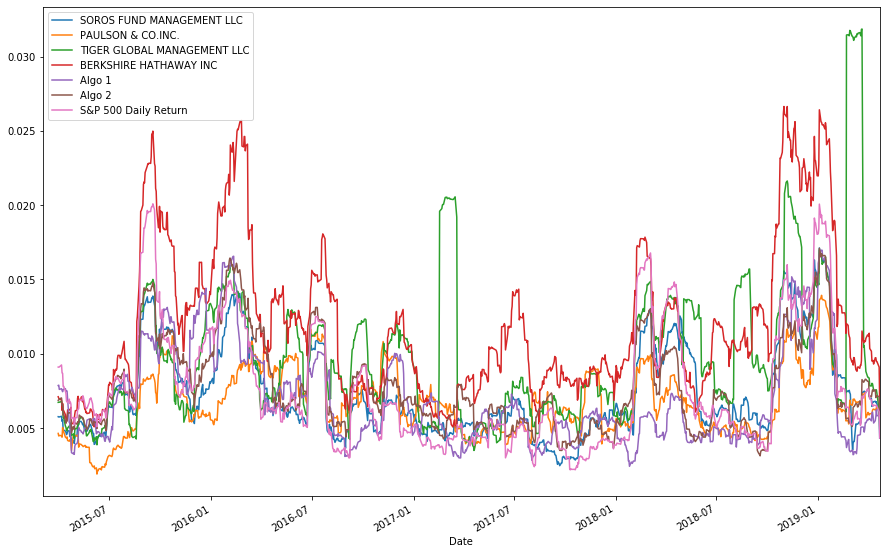

In [105]:
all_data_rolling_std= all_data.rolling(window=21).std()
all_data_rolling_std.plot(figsize=(15,10))

In [106]:
# Correlation
correlation = all_data.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Return
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500 Daily Return,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [107]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
algo2_covariance= all_data['Algo 2'].cov(all_data['S&P 500 Daily Return'])
algo2_variance = all_data['S&P 500 Daily Return'].var()
algo2_beta = algo2_covariance/algo2_variance
print(algo2_beta)

0.8375345402757788


### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [108]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [110]:
# Annualzied Sharpe Ratios

avg_return= all_data.mean()*252
avg_return
std = all_data.std()*252
std 
sp_500_return=all_data['S&P 500 Daily Return'].mean()*252

sharp_ratio = (avg_return - sp_500_return)/std
sharp_ratio

SOROS FUND MANAGEMENT LLC     -0.021790
PAULSON & CO.INC.             -0.080199
TIGER GLOBAL MANAGEMENT LLC   -0.039690
BERKSHIRE HATHAWAY INC         0.012131
Algo 1                         0.041007
Algo 2                        -0.010289
S&P 500 Daily Return           0.000000
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

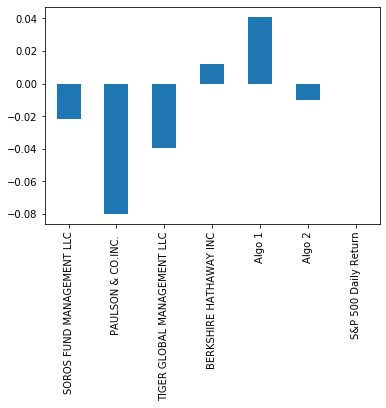

In [111]:
# Visualize the sharpe ratios as a bar plot
sharp_ratio.plot(kind='bar')

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [113]:
# Read the first stock
aapl_path= Path('Resources/AAPL.csv')
aapl_price= pd.read_csv(aapl_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
aapl_price= aapl_price.drop(columns=['Open','High','Low','Adj Close','Volume'])
aapl_price.rename(columns={'Close':'Apple'}, inplace=True)
aapl_price.head()


,Apple
Date,
2017-10-04,153.479996
2017-10-05,155.389999
2017-10-06,155.300003
2017-10-09,155.839996
2017-10-10,155.899994


In [114]:
# Read the second stock
goog_path= Path('Resources/GOOG.csv')
goog_price= pd.read_csv(goog_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
goog_price= goog_price.drop(columns=['Open','High','Low','Adj Close','Volume'])
goog_price.rename(columns={'Close':'Google'}, inplace=True)
goog_price.head()


,Google
Date,
2017-10-04,951.679993
2017-10-05,969.960022
2017-10-06,978.890015
2017-10-09,977.000000
2017-10-10,972.599976


In [115]:
# Read the third stock
msft_path= Path('Resources/MSFT.csv')
msft_price= pd.read_csv(msft_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
msft_price= msft_price.drop(columns=['Open','High','Low','Adj Close','Volume'])
msft_price.rename(columns={'Close':'Microsoft'}, inplace=True)
msft_price.head()


,Microsoft
Date,
2017-10-04,74.690002
2017-10-05,75.970001
2017-10-06,76.000000
2017-10-09,76.290001
2017-10-10,76.290001


In [116]:
# Concatenate all stocks into a single DataFrame
my_portfolio = pd.concat([aapl_price,goog_price,msft_price], join='inner',axis='columns')
my_portfolio.head()

,Apple,Google,Microsoft
Date,,,
2017-10-04,153.479996,951.679993,74.690002
2017-10-05,155.389999,969.960022,75.970001
2017-10-06,155.300003,978.890015,76.000000
2017-10-09,155.839996,977.000000,76.290001
2017-10-10,155.899994,972.599976,76.290001


In [117]:
# Drop Nulls
my_portfolio.dropna(inplace=True)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [118]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
my_portfolio_daily_return= my_portfolio.pct_change()
my_portfolio_daily_return.dropna(inplace=True)

my_portfolio_weighted_return= my_portfolio_daily_return. dot(weights)
my_portfolio_weighted_return.dropna(inplace=True)
my_portfolio_weighted_return.head()

Date
2017-10-05    0.016263
2017-10-06    0.003007
2017-10-09    0.001787
2017-10-10   -0.001373
2017-10-11    0.007664
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [119]:
new_all_data= pd.concat ([all_data,my_portfolio_daily_return], join='inner', axis='columns')
new_all_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Return,Apple,Google,Microsoft
Date,,,,,,,,,,
2017-10-05,0.002519,-0.002141,0.005948,0.010979,0.000036,0.006071,0.005647,0.012445,0.019208,0.017137
2017-10-06,-0.001356,-0.001354,-0.001291,-0.000411,0.003796,-0.003162,-0.001074,-0.000579,0.009207,0.000395
2017-10-09,-0.003295,-0.004799,-0.012072,0.000848,0.002666,-0.002772,-0.001804,0.003477,-0.001931,0.003816
2017-10-10,-0.000573,0.001926,0.009342,0.009059,0.002520,0.005568,0.002322,0.000385,-0.004504,0.000000
2017-10-11,0.002238,0.000024,0.001239,-0.004142,-0.000572,0.001052,0.001803,0.004169,0.017119,0.001704


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [120]:
# Risk
new_std = new_all_data.std()*np.sqrt(252)
new_std.sort_values(inplace=True)
new_std

PAULSON & CO.INC.              0.115255
Algo 1                         0.116449
Algo 2                         0.132421
SOROS FUND MANAGEMENT LLC      0.142354
S&P 500 Daily Return           0.150057
TIGER GLOBAL MANAGEMENT LLC    0.209250
BERKSHIRE HATHAWAY INC         0.221673
Google                         0.254653
Microsoft                      0.257435
Apple                          0.276150
dtype: float64

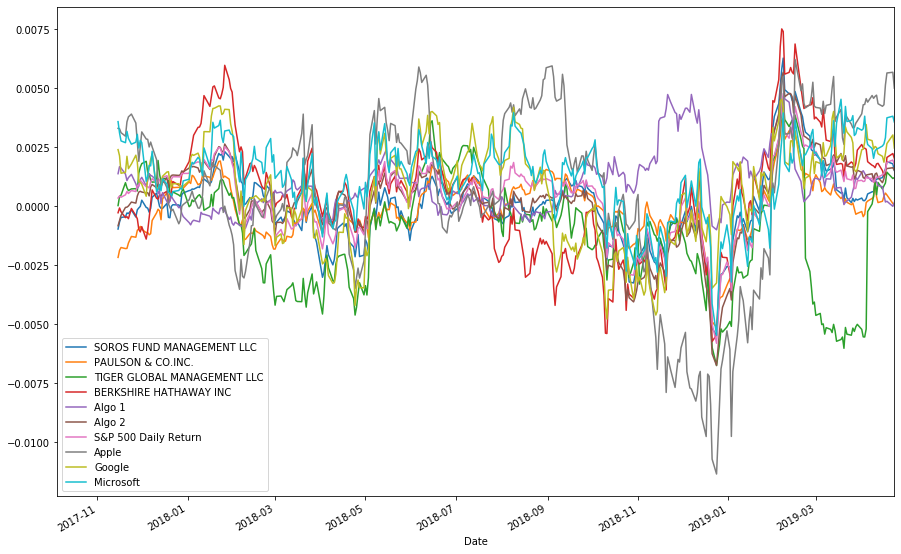

In [121]:
# Rolling
rolling_data= new_all_data.rolling(window=30).mean()
rolling_data.plot(figsize=(15,10))

In [122]:
# Beta

aapl_covariance= new_all_data['Apple'].cov(new_all_data['S&P 500 Daily Return'])
aapl_variance = new_all_data['S&P 500 Daily Return'].var()
aapl_beta = aapl_covariance/aapl_variance
print(aapl_beta)



1.3375208957605522


In [123]:
# Annualzied Sharpe Ratios
new_avg_return= new_all_data.mean()*252
new_avg_return
new_std = new_all_data.std()*252
std 

new_sharp_ratio = (new_avg_return - sp_500_return)/new_std
new_sharp_ratio

SOROS FUND MANAGEMENT LLC     -0.030052
PAULSON & CO.INC.             -0.068863
TIGER GLOBAL MANAGEMENT LLC   -0.097907
BERKSHIRE HATHAWAY INC         0.011777
Algo 1                         0.070178
Algo 2                        -0.017019
S&P 500 Daily Return           0.007312
Apple                          0.033316
Google                         0.031928
Microsoft                      0.068983
dtype: float64

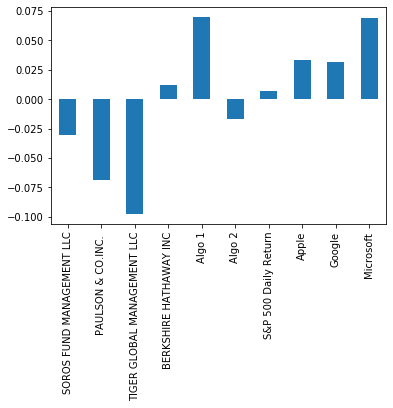

In [124]:
# Visualize the sharpe ratios as a bar plot
new_sharp_ratio.plot(kind='bar')

## Include correlation analysis to determine which stocks (if any) are correlated

In [125]:
new_all_data.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Return,Apple,Google,Microsoft
SOROS FUND MANAGEMENT LLC,1.000000,0.749976,0.511408,0.778880,0.325916,0.827303,0.831066,0.588229,0.654777,0.640294
PAULSON & CO.INC.,0.749976,1.000000,0.490559,0.623309,0.336018,0.770284,0.745183,0.485487,0.542790,0.540122
TIGER GLOBAL MANAGEMENT LLC,0.511408,0.490559,1.000000,0.373126,0.134066,0.481123,0.558071,0.378568,0.375603,0.383967
BERKSHIRE HATHAWAY INC,0.778880,0.623309,0.373126,1.000000,0.311982,0.778404,0.829705,0.672996,0.795135,0.785378
Algo 1,0.325916,0.336018,0.134066,0.311982,1.000000,0.316427,0.269198,0.240116,0.252282,0.225511
Algo 2,0.827303,0.770284,0.481123,0.778404,0.316427,1.000000,0.877513,0.625391,0.685561,0.689669
S&P 500 Daily Return,0.831066,0.745183,0.558071,0.829705,0.269198,0.877513,1.000000,0.726795,0.805813,0.836772
Apple,0.588229,0.485487,0.378568,0.672996,0.240116,0.625391,0.726795,1.000000,0.670990,0.683084
Google,0.654777,0.542790,0.375603,0.795135,0.252282,0.685561,0.805813,0.670990,1.000000,0.793707
Microsoft,0.640294,0.540122,0.383967,0.785378,0.225511,0.689669,0.836772,0.683084,0.793707,1.000000


In [127]:
with open (output_path,'w') as file: 
    file.write (f'Performance Analysis\n 1. Based on the culmulative return, Berkshire Hathaway Inc. and Algo 1 outperform S&P 500 in the long term\n') 
    file.write (f'Risk Analysis\n 1. Based on the box plot of each of the returns, Tiger Global Management LLC has the largest spread, and Paulson&Co Inc has the smallest spread.\n 2. Tiger global Management LLC and Berkshire Hathaway Inc are riskier than S&P 500 since their standard deviations are larger than that of the S&P 500.')
    file.write (f'Rolling Statistics\n 1. Based on the rolling standard deviation of the portfolios and of the S&P 500, the risk of each portfolio moves at approximately the same time risk increases in the S&P\n 2. Based on the correlation table, algorithmic 2 protfolio most closely mimic the S&P\n 3. Algorithmic 2 portfolio has a beta of .84, which means that it closesly tracks the movement of the overall market\n')
    file.write (f'Sharp Ratio\n 2. The algorithmic stratigies, particularly the algo 1 portfolio, outform both the market nd the whales portfolios.\n')
    file.write (f'Custom Portfolio\n 3.basesd on the shapr ratio bar plot, my portfolio returns outperforms the market as well as the whals portfolio.\n')